# DAF1 

## Melbourne dataset





In [1]:
# Ignore the warnings 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import integrate

# Main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

# Import libraries for pre-processing

from datetime import datetime
from scipy.stats import norm



In [2]:
# Reading csv file Housing FULL

housing= pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
# Visualizing the first 5 rows for every column

housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# Check the type of variables

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
# Check basic statistics

housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


# Data understading


  


In [8]:
# check missing data

housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

We have a lot of missing values such as:

- Price
- Distance 
- Postcode
- Bathroom
- Car
- Landsize 
- BuildingArea
- YearBuilt
- CouncilArea
- Lattitude 
- Longtitude
- Regionname
- Propertycount



### Let's start to analyze how we will treat the missing values

### Lattitude and Longtitude

In [9]:
# Summary of Lattitude median
# Let's use this values and input the median for Region name

lat = housing[['Lattitude','Regionname', 'Longtitude']].groupby(['Regionname']) \
.mean().sort_values(['Lattitude'],ascending=False)

lat

,Lattitude,Longtitude
Regionname,,
Northern Victoria,-37.588788,144.847316
Western Victoria,-37.695466,144.566743
Northern Metropolitan,-37.735883,144.983600
Western Metropolitan,-37.783581,144.844722
Eastern Metropolitan,-37.798125,145.144867
Southern Metropolitan,-37.867389,145.035437
Eastern Victoria,-37.935391,145.328782
South-Eastern Metropolitan,-37.997618,145.152764


### Bathroom and Cars

In [10]:
# Checking the distribution of bathrooms

housing['Bathroom'].value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

In [11]:
# Summary of Car and Bathroom
# Let's use the median to input this values for Car and Bathroom

car = housing[['Car','Regionname', 'Bathroom']].groupby(['Regionname']) \
.mean().sort_values(['Regionname'],ascending=False)

round(car)

,Car,Bathroom
Regionname,,
Western Victoria,2.0,1.0
Western Metropolitan,2.0,2.0
Southern Metropolitan,2.0,2.0
South-Eastern Metropolitan,2.0,2.0
Northern Victoria,2.0,2.0
Northern Metropolitan,2.0,1.0
Eastern Victoria,2.0,2.0
Eastern Metropolitan,2.0,2.0


### Price

In [12]:
# Summary of Price mean or median, let's decide! 
# Let's use this values and input the median for Region name

price = housing[['Price','Regionname']].groupby(['Regionname']) \
.mean().sort_values(['Price'],ascending=False)

round(price)

,Price
Regionname,
Southern Metropolitan,1395928.0
Eastern Metropolitan,1108723.0
South-Eastern Metropolitan,877683.0
Northern Metropolitan,861484.0
Western Metropolitan,837615.0
Eastern Victoria,714328.0
Northern Victoria,619051.0
Western Victoria,432607.0


### Building Area and Landsize

In [13]:
# Summary of Building Area or Landsize mean or median, let's decide! 
# Let's use this values and input the median for Region name

build = housing[['BuildingArea','Regionname', 'Landsize']].groupby(['Regionname']) \
.mean().sort_values(['Regionname'],ascending=False)

round(build)

,BuildingArea,Landsize
Regionname,,
Western Victoria,133.0,1099.0
Western Metropolitan,152.0,545.0
Southern Metropolitan,168.0,534.0
South-Eastern Metropolitan,169.0,652.0
Northern Victoria,585.0,4037.0
Northern Metropolitan,133.0,534.0
Eastern Victoria,175.0,2315.0
Eastern Metropolitan,184.0,686.0


### Year built

In [14]:
# Summary of Price mean or median, let's decide! 
# Let's use this values and input the median for Region name

# Maybe doesn't make any sense because we have a lot of missing values, maybe we should delete these rows!!! 

year = housing[['YearBuilt', 'Regionname']].groupby(['Regionname']) \
.mean().sort_values(['YearBuilt'],ascending=False)

round(year)

,YearBuilt
Regionname,
Northern Victoria,1995.0
Eastern Victoria,1986.0
South-Eastern Metropolitan,1978.0
Western Victoria,1978.0
Eastern Metropolitan,1973.0
Western Metropolitan,1971.0
Northern Metropolitan,1963.0
Southern Metropolitan,1957.0


### Council Area finding the 3 missing values

So, theses 3 missing values for Council Area are located in the Suburb:

- Footscray
- Camberwell
- Fawkner Lot

In [15]:
# Filtering just null values for Council Area

housing[housing['CouncilArea'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Let's find which Council area correspond to the Suburbs

#
footscray_area = housing[housing['Suburb'] == 'Footscray']['CouncilArea'].value_counts()
camberwell_area = housing[housing['Suburb'] == 'Camberwell']['CouncilArea'].value_counts()

# No values at all for this Suburb, we can delete! 
fawkner_area = housing[housing['Suburb'] == 'Fawkner Lot']['CouncilArea'].value_counts()

# Printing 
print(footscray_area)
print(camberwell_area)
print(fawkner_area)


Maribyrnong City Council    262
Name: CouncilArea, dtype: int64
Boroondara City Council    422
Name: CouncilArea, dtype: int64
Series([], Name: CouncilArea, dtype: int64)


### Region name finding missing values


In [17]:
# Region name is null

housing[housing['Regionname'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Region Name by Suburb looking for the values

footscray_region = housing[housing['Suburb'] == 'Footscray']['Regionname'].value_counts()
camberwell_region = housing[housing['Suburb'] == 'Camberwell']['Regionname'].value_counts()

# No values at all for this Suburb, we can delete!  
fawkner_region = housing[housing['Suburb'] == 'Fawkner Lot']['Regionname'].value_counts()

print(footscray_region)
print(camberwell_region)
print(fawkner_region)

Western Metropolitan    262
Name: Regionname, dtype: int64
Southern Metropolitan    422
Name: Regionname, dtype: int64
Series([], Name: Regionname, dtype: int64)


### Property count finding missing values


In [19]:
# Property count

housing[housing['Propertycount'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Property Count by Suburb looking for the values 

footscray_property = housing[housing['Suburb']=='Footscray']['Propertycount'].value_counts()
camberwell_property = housing[housing['Suburb']=='Camberwell']['Propertycount'].value_counts()

# No values at all for this Suburb, we can delete!  
fawkner_property = housing[housing['Suburb']=='Fawkner Lot']['Propertycount'].value_counts()

print(footscray_property)
print(camberwell_property)
print(fawkner_property)

7570.0    262
Name: Propertycount, dtype: int64
8920.0    422
Name: Propertycount, dtype: int64
Series([], Name: Propertycount, dtype: int64)


# Categorical Variables summary of unique values

### As we are going to test Regression models we need to use dummy for categorical variables. So, that means making sure that we convert the right variables avoiding creating thousands of new features as we have in our dataset a lot of unique values for the same feature

**We need to make a decision about the Categorical variables that we are going to use**

- `Suburb:` There are 351 unique Suburbs, so if we apply dummy variable it will add 350 new columns plus the others categorical variables, so we need to make a decision!!!!

- `CouncilArea:` There are 33 unique Council Areas not bad! Maybe a better solution to use instead of Suburb

- `SellerG:` There are 388 unique Seller G type! Not sure if we need to use it we can probably try to see the correlation and maybe drop it because we will need to use Dummy Variable and it will create 387 new columns!!!

- `Postcode:` There are 211 unique Postcode! We can use either Suburb, Council Area or Post Code I think one of them will be enough

- `Method:` There are 9 unique types of method, not bad we can use Dummy variables!

- `Type:` There are 3 unique Type, not bad! 

- `Address:` We may delete that columns because we have all the necessary information

### Below are all the codes showing these results:

In [21]:
# Unique values for Suburb
# So we have 351 Suburbs! We have to manage to group that or don't includ it in our analysis
# Because as we've learned we need to use Dummy Variable for Regression, imagine 351 unique values

housing['Suburb'].value_counts()

Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
                 ... 
Coldstream          1
Wildwood            1
Ferny Creek         1
Monbulk             1
viewbank            1
Name: Suburb, Length: 351, dtype: int64

In [22]:
# Number of Council Area

len(housing['CouncilArea'].value_counts())

33

In [23]:
# Number of Sellers

housing['SellerG'].value_counts()

Jellis                  3359
Nelson                  3236
Barry                   3235
hockingstuart           2623
Marshall                2027
                        ... 
Jeffrey                    1
Waterfront                 1
VicHomes                   1
Veitch                     1
hockingstuart/Jellis       1
Name: SellerG, Length: 388, dtype: int64

In [24]:
# Number of unique Post Code 

housing['Postcode'].value_counts()

3073.0    844
3046.0    638
3020.0    617
3121.0    612
3165.0    583
         ... 
3139.0      1
3159.0      1
3793.0      1
3788.0      1
3428.0      1
Name: Postcode, Length: 211, dtype: int64

In [25]:
# Number of unique Method 

len(housing['Method'].value_counts())

9

In [26]:
# Number of unique Type

housing['Type'].value_counts()

h    23980
u     7297
t     3580
Name: Type, dtype: int64

In [27]:
housing['Address'].value_counts()

5 Charles St        6
25 William St       4
33 McCracken St     3
3 Charles St        3
36 Aberfeldie St    3
                   ..
129 Banksia St      1
38 Caroline St      1
1/18 Leafield St    1
250 Hawthorn Rd     1
54 Bardsley St      1
Name: Address, Length: 34009, dtype: int64

In [28]:
housing['Regionname'].value_counts()

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

# Imputation for numerial variables

### Lattitude and Longitude

In [29]:
# If Statement for Lattitude

def impute_lat(cols):
    Lattitude = cols[0]
    Regionname = cols[1]
    
    if pd.isnull(Lattitude):

        if Regionname == 'Southern Metropolitan':
                return -37.858535

        elif Regionname == 'Eastern Metropolitan':
                return -37.791400

        elif Regionname == 'South-Eastern Metropolitan':
                return -37.981210

        elif Regionname == 'Northern Metropolitan':
                return -37.741300

        elif Regionname == 'Western Metropolitan':
                return -37.780710 

        elif Regionname == 'Eastern Victoria':
                return -38.003900

        elif Regionname == 'Northern Victoria':
                return -37.615790

        elif Regionname == 'Western Victoria':
                return -37.695775


    else:
        return Lattitude

In [30]:
# Applying the function

housing['Lattitude'] = housing[['Lattitude','Regionname']].apply(impute_lat,axis=1)

# Checking
# We will delete these three rows because they don't have data for almost all the features

len(housing[housing['Lattitude'].isnull()])

3

In [31]:
# If Statement for Longtitude

def impute_long(cols):
    Longtitude = cols[0]
    Regionname = cols[1]
    
    if pd.isnull(Longtitude):

        if Regionname == 'Southern Metropolitan':
                return 145.038705

        elif Regionname == 'Eastern Metropolitan':
                return 145.138170

        elif Regionname == 'South-Eastern Metropolitan':
                return 145.141850

        elif Regionname == 'Northern Metropolitan':
                return 144.983780

        elif Regionname == 'Western Metropolitan':
                return 144.873105 

        elif Regionname == 'Eastern Victoria':
                return 145.330950

        elif Regionname == 'Northern Victoria':
                return 144.689990

        elif Regionname == 'Western Victoria':
                return 144.573620


    else:
        return Longtitude

In [32]:
# Applying the function

housing['Longtitude'] = housing[['Longtitude','Regionname']].apply(impute_long,axis=1)

# Checking
# We will delete these three rows because they don't have data for almost all the features

len(housing[housing['Longtitude'].isnull()])

3

In [33]:
# If Statement for Car Park

def impute_car(cols):
    Car = cols[0]
    Regionname = cols[1]
    
    if pd.isnull(Car):

        if Regionname == 'Southern Metropolitan':
                return 2

        elif Regionname == 'Eastern Metropolitan':
                return 2

        elif Regionname == 'South-Eastern Metropolitan':
                return 2

        elif Regionname == 'Northern Metropolitan':
                return 1

        elif Regionname == 'Western Metropolitan':
                return 2 

        elif Regionname == 'Eastern Victoria':
                return 2

        elif Regionname == 'Northern Victoria':
                return 2

        elif Regionname == 'Western Victoria':
                return 2


    else:
        return Car

In [34]:
# Applying the function

housing['Car'] = housing[['Car','Regionname']].apply(impute_car,axis=1)

# Checking
# We will delete these three rows because they don't have data for almost all the features

len(housing[housing['Car'].isnull()])

3

In [35]:
# If Statement for Bathrooom

def impute_bath(cols):
    Bathroom = cols[0]
    Regionname = cols[1]
    
    if pd.isnull(Bathroom):

        if Regionname == 'Southern Metropolitan':
                return 2

        elif Regionname == 'Eastern Metropolitan':
                return 2

        elif Regionname == 'South-Eastern Metropolitan':
                return 2

        elif Regionname == 'Northern Metropolitan':
                return 1

        elif Regionname == 'Western Metropolitan':
                return 1 

        elif Regionname == 'Eastern Victoria':
                return 2

        elif Regionname == 'Northern Victoria':
                return 1

        elif Regionname == 'Western Victoria':
                return 1


    else:
        return Bathroom

In [36]:
# Applying the function

housing['Bathroom'] = housing[['Bathroom','Regionname']].apply(impute_bath,axis=1)

# Checking
# We will delete these three rows because they don't have data for almost all the features

len(housing[housing['Bathroom'].isnull()])

3

### Building Area and Landsize

In [37]:
# If Statement for BuildingArea

def impute_build(cols):
    BuildingArea = cols[0]
    Regionname = cols[1]
    
    if pd.isnull(BuildingArea):

        if Regionname == 'Southern Metropolitan':
                return 145.00

        elif Regionname == 'Eastern Metropolitan':
                return 157.00

        elif Regionname == 'South-Eastern Metropolitan':
                return 147.00

        elif Regionname == 'Northern Metropolitan':
                return 120.00

        elif Regionname == 'Western Metropolitan':
                return 136.00 

        elif Regionname == 'Eastern Victoria':
                return 157.00

        elif Regionname == 'Northern Victoria':
                return 151.50

        elif Regionname == 'Western Victoria':
                return 122.86


    else:
        return BuildingArea

In [38]:
# Applying the function

housing['BuildingArea'] = housing[['BuildingArea','Regionname']].apply(impute_build,axis=1)

# Checking
# We will delete these three rows because they don't have data for almost all the features

len(housing[housing['BuildingArea'].isnull()])

3

In [39]:
# If Statement for Landsize

def impute_land(cols):
    Landsize = cols[0]
    Regionname = cols[1]
    
    if pd.isnull(Landsize):

        if Regionname == 'Southern Metropolitan':
                return 443.00

        elif Regionname == 'Eastern Metropolitan':
                return 666.00

        elif Regionname == 'South-Eastern Metropolitan':
                return 623.50

        elif Regionname == 'Northern Metropolitan':
                return 392.00

        elif Regionname == 'Western Metropolitan':
                return 492.00

        elif Regionname == 'Eastern Victoria':
                return 855.50

        elif Regionname == 'Northern Victoria':
                return 740.00

        elif Regionname == 'Western Victoria':
                return 603.00


    else:
        return Landsize

In [40]:
# Applying the function

housing['Landsize'] = housing[['Landsize','Regionname']].apply(impute_land,axis=1)

# Checking
# We will delete these three rows because they don't have data for almost all the features

len(housing[housing['Landsize'].isnull()])

3

### Year built

In [41]:
# If Statement for Year Built

def impute_year(cols):
    YearBuilt = cols[0]
    Regionname = cols[1]
    
    if pd.isnull(YearBuilt):

        if Regionname == 'Southern Metropolitan':
                return 1960

        elif Regionname == 'Eastern Metropolitan':
                return 1970

        elif Regionname == 'South-Eastern Metropolitan':
                return 1975

        elif Regionname == 'Northern Metropolitan':
                return 1970

        elif Regionname == 'Western Metropolitan':
                return 1977

        elif Regionname == 'Eastern Victoria':
                return 1986

        elif Regionname == 'Northern Victoria':
                return 2000

        elif Regionname == 'Western Victoria':
                return 1975


    else:
        return YearBuilt

In [42]:
# Applying the function

housing['YearBuilt'] = housing[['YearBuilt','Regionname']].apply(impute_year,axis=1)

# Checking
# We will delete these three rows because they don't have data for almost all the features

len(housing[housing['YearBuilt'].isnull()])

3

### Dropping all the others nan values

In [43]:
housing.dropna(inplace=True)

In [44]:
# Dropping Bedroom2 to avoid redundancy

housing= housing.drop(['Bedroom2'], axis=1)

In [45]:
housing.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

All the imputations are done and the data is ready to be analyzed!

# Changing data types

- Postcode from float to obj

- Bathroom from float to int

- Car from float to int

- Property Count from float to int

- Yearbuilt from float to int

In [46]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20806 entries, 1 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         20806 non-null  object 
 1   Address        20806 non-null  object 
 2   Rooms          20806 non-null  int64  
 3   Type           20806 non-null  object 
 4   Price          20806 non-null  float64
 5   Method         20806 non-null  object 
 6   SellerG        20806 non-null  object 
 7   Date           20806 non-null  object 
 8   Distance       20806 non-null  float64
 9   Postcode       20806 non-null  float64
 10  Bathroom       20806 non-null  float64
 11  Car            20806 non-null  float64
 12  Landsize       20806 non-null  float64
 13  BuildingArea   20806 non-null  float64
 14  YearBuilt      20806 non-null  float64
 15  CouncilArea    20806 non-null  object 
 16  Lattitude      20806 non-null  float64
 17  Longtitude     20806 non-null  float64
 18  Region

In [47]:
# Post Code ----> maybe change to obj
housing['Postcode']= housing['Postcode'].astype('object')

# Property Count
housing['Propertycount']= housing['Propertycount'].astype('int')

# Year built
housing['YearBuilt']= housing['YearBuilt'].astype('int')

# Bathroom
housing['Bathroom']= housing['Bathroom'].astype('int')

# Car
housing['Car']= housing['Car'].astype('int')

In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20806 entries, 1 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         20806 non-null  object 
 1   Address        20806 non-null  object 
 2   Rooms          20806 non-null  int64  
 3   Type           20806 non-null  object 
 4   Price          20806 non-null  float64
 5   Method         20806 non-null  object 
 6   SellerG        20806 non-null  object 
 7   Date           20806 non-null  object 
 8   Distance       20806 non-null  float64
 9   Postcode       20806 non-null  object 
 10  Bathroom       20806 non-null  int64  
 11  Car            20806 non-null  int64  
 12  Landsize       20806 non-null  float64
 13  BuildingArea   20806 non-null  float64
 14  YearBuilt      20806 non-null  int64  
 15  CouncilArea    20806 non-null  object 
 16  Lattitude      20806 non-null  float64
 17  Longtitude     20806 non-null  float64
 18  Region

In [49]:
#create the new column data restructuring the original Date column with pd.to_datetime

housing['data'] = pd.to_datetime(housing['Date'])

In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20806 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         20806 non-null  object        
 1   Address        20806 non-null  object        
 2   Rooms          20806 non-null  int64         
 3   Type           20806 non-null  object        
 4   Price          20806 non-null  float64       
 5   Method         20806 non-null  object        
 6   SellerG        20806 non-null  object        
 7   Date           20806 non-null  object        
 8   Distance       20806 non-null  float64       
 9   Postcode       20806 non-null  object        
 10  Bathroom       20806 non-null  int64         
 11  Car            20806 non-null  int64         
 12  Landsize       20806 non-null  float64       
 13  BuildingArea   20806 non-null  float64       
 14  YearBuilt      20806 non-null  int64         
 15  CouncilArea    2080

In [51]:
# Calculate day of year
housing['doy'] = housing['data'].dt.dayofyear

# Create year
housing['Year'] = housing['data'].dt.year

# to divide by season it's better to use the day of the year instead of the months
spring = range(80, 172)
summer = range(172, 264)
autumn = range(264, 355)
#winter = everything else

daje = []
for i in housing['doy']:
    if i in spring:
        season = 'spring'
    elif i in summer:
        season = 'summer'
    elif i in autumn:
        season = 'autumn'
    else:
        season = 'winter'
    daje.append(season)   

#add the resulting column to the dataframe (after transforming it as a Series)
housing['season']= pd.Series(daje)

In [52]:
# Looking for outliers!! 

housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,20806.0,3.061328e+00,0.944653,1.00000,2.000000,3.00000,4.000000e+00,1.600000e+01
Price,20806.0,1.090167e+06,652873.408445,85000.00000,660000.000000,910000.00000,1.335000e+06,1.120000e+07
Distance,20806.0,1.137804e+01,6.889893,0.00000,6.400000,10.40000,1.420000e+01,4.810000e+01
Bathroom,20806.0,1.591752e+00,0.700820,0.00000,1.000000,1.00000,2.000000e+00,9.000000e+00
Car,20806.0,1.713448e+00,0.987341,0.00000,1.000000,2.00000,2.000000e+00,1.800000e+01
Landsize,20806.0,5.802614e+02,3493.354709,0.00000,259.000000,492.00000,6.560000e+02,4.330140e+05
BuildingArea,20806.0,1.476150e+02,321.742030,0.00000,120.000000,136.00000,1.570000e+02,4.451500e+04
YearBuilt,20806.0,1.967678e+03,28.402290,1196.00000,1960.000000,1970.00000,1.977000e+03,2.019000e+03
Lattitude,20806.0,-3.780679e+01,0.091713,-38.19043,-37.860650,-37.79980,-3.774860e+01,-3.739780e+01
Longtitude,20806.0,1.449968e+02,0.120800,144.42379,144.925077,145.00343,1.450689e+02,1.455264e+02


In [53]:
# First, cleaning the zeros 

housing = housing[housing.Landsize != 0]
housing = housing[housing.Bathroom != 0]
housing = housing[housing.Distance != 0]
housing = housing[housing.Car != 0]
housing = housing[housing.BuildingArea != 0]

# Outliers

# Fixing the typing error 2106 to 2016

housing['YearBuilt'] = housing['YearBuilt'].replace(to_replace=2106,value=2016, regex=True)

# Creating a new variable called House Age: 2020 - YearBuilt 

housing['houseAge'] = 2020-housing['YearBuilt']

#housing = housing[housing['houseAge'] < 90]

housing.describe().T




,count,mean,std,min,25%,50%,75%,max
Rooms,17685.0,3.205485e+00,0.888785,1.00000,3.00000,3.00000,4.000000e+00,1.600000e+01
Price,17685.0,1.136256e+06,667292.994652,131000.00000,697000.00000,950000.00000,1.385000e+06,1.120000e+07
Distance,17685.0,1.218169e+01,6.883707,0.70000,7.50000,11.20000,1.470000e+01,4.810000e+01
Bathroom,17685.0,1.653605e+00,0.712682,1.00000,1.00000,2.00000,2.000000e+00,9.000000e+00
Car,17685.0,1.886118e+00,0.925604,1.00000,1.00000,2.00000,2.000000e+00,1.800000e+01
Landsize,17685.0,6.534121e+02,3766.734923,1.00000,371.00000,538.00000,6.660000e+02,4.330140e+05
BuildingArea,17685.0,1.536218e+02,346.907706,1.00000,120.00000,143.00000,1.570000e+02,4.451500e+04
YearBuilt,17685.0,1.968469e+03,27.643208,1196.00000,1960.00000,1970.00000,1.980000e+03,2.019000e+03
Lattitude,17685.0,-3.780508e+01,0.096448,-38.19043,-37.86463,-37.79532,-3.774120e+01,-3.739780e+01
Longtitude,17685.0,1.449994e+02,0.127192,144.42379,144.91952,145.01060,1.450779e+02,1.455264e+02


In [54]:
housing.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
data                0
doy                 0
Year                0
season           7503
houseAge            0
dtype: int64

In [55]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17685 entries, 1 to 34854
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         17685 non-null  object        
 1   Address        17685 non-null  object        
 2   Rooms          17685 non-null  int64         
 3   Type           17685 non-null  object        
 4   Price          17685 non-null  float64       
 5   Method         17685 non-null  object        
 6   SellerG        17685 non-null  object        
 7   Date           17685 non-null  object        
 8   Distance       17685 non-null  float64       
 9   Postcode       17685 non-null  object        
 10  Bathroom       17685 non-null  int64         
 11  Car            17685 non-null  int64         
 12  Landsize       17685 non-null  float64       
 13  BuildingArea   17685 non-null  float64       
 14  YearBuilt      17685 non-null  int64         
 15  CouncilArea    1768

In [56]:
housing

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,data,doy,Year,season,houseAge
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019,2016-03-12,72,2016,spring,50
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019,2017-04-03,93,2017,summer,50
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019,2016-04-06,97,2016,summer,6
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067,...,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019,2016-08-10,223,2016,spring,130
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067,...,Yarra City Council,-37.80100,144.99890,Northern Metropolitan,4019,2016-08-10,223,2016,summer,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750,...,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940,2018-02-24,55,2018,NaN,8
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,24/02/2018,6.3,3013,...,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543,2018-02-24,55,2018,NaN,43
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013,...,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543,2018-02-24,55,2018,NaN,43
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013,...,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543,2018-02-24,55,2018,NaN,2


# Exploration Data Analysis (EDA)

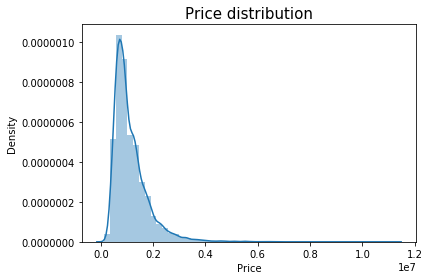

In [57]:
# Price distribution after data cleaning
plt.title('Price distribution', fontsize = 15)
sns.distplot(housing['Price'])


 mu = 1136255.80 and sigma = 667274.13



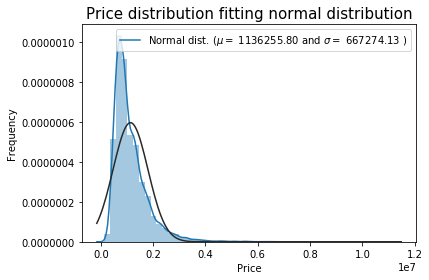

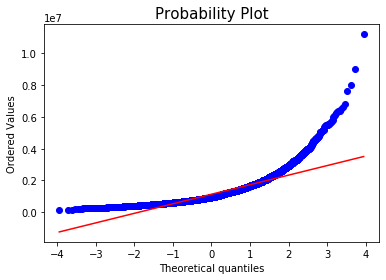

In [58]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(housing['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(housing['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution fitting normal distribution', fontsize=15)

fig = plt.figure()
res = stats.probplot(housing['Price'], plot=plt)
plt.title('Probability Plot', fontsize=15)
plt.show()

In [59]:
# log1p. Return the natural logarithm of one plus the input array, element-wise. 
# At locations where the condition is True, the out array will be set to the ufunc result.

housing.Price = np.log1p(housing.Price )

# Defining Price as dependent variable
y = housing.Price

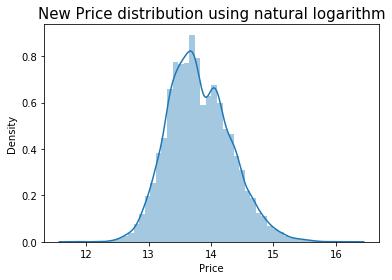

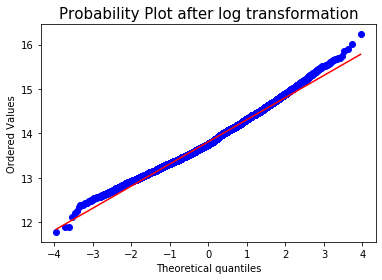

In [89]:
# Price distribution after data cleaning
plt.title('New Price distribution using natural logarithm', fontsize = 15)
sns.distplot(housing['Price'])

# Probability Plot after log transformation, looking good!

fig = plt.figure()
res = stats.probplot(housing['Price'], plot=plt)
plt.title('Probability Plot after log transformation', fontsize=15)
plt.show()

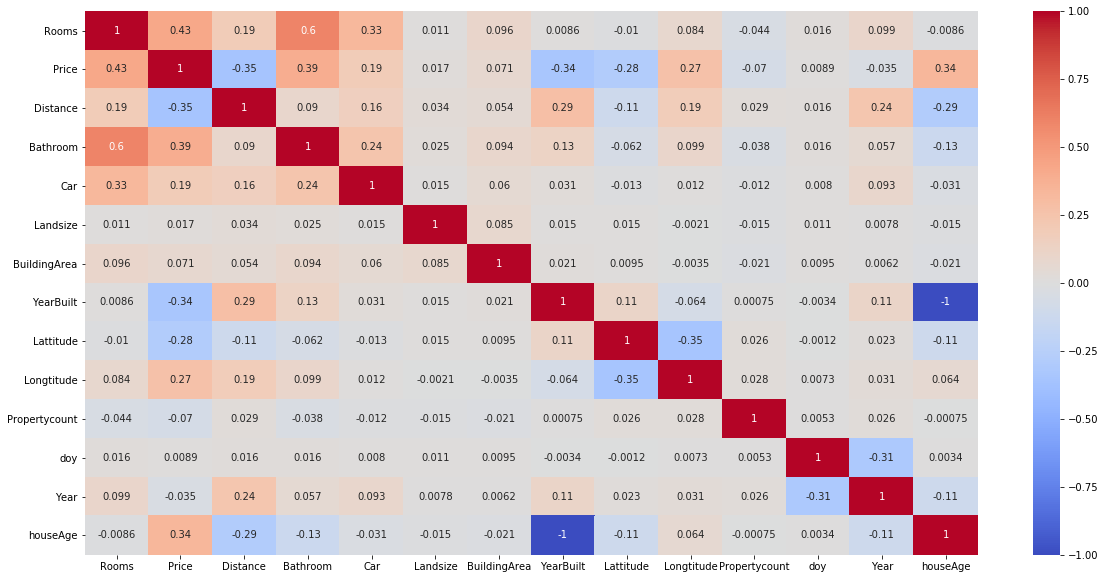

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(housing.corr(),cmap='coolwarm',annot=True)

# Exploration Data Analysis

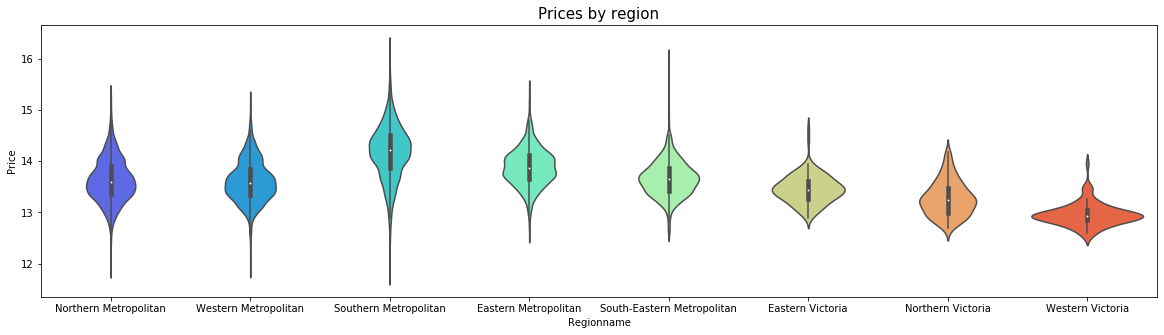

In [64]:
# Price x Region name

plt.figure(figsize=(20,5))
plt.title('Prices by region', fontsize = 15)
sns.violinplot(x='Regionname', y='Price', data=housing,palette='rainbow')

<Figure size 720x720 with 0 Axes>

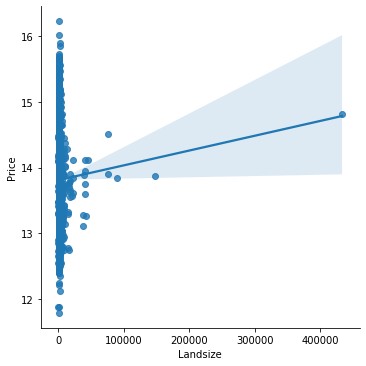

In [65]:
# Price x Landsize
plt.figure(figsize=(10,10))
sns.lmplot(x='Landsize',y='Price',data=housing)

<Figure size 720x720 with 0 Axes>

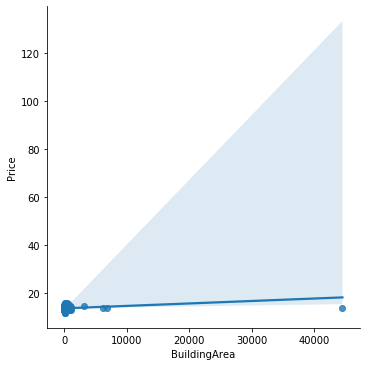

In [66]:
# Price x Building Area

plt.figure(figsize=(10,10))
sns.lmplot(x='BuildingArea',y='Price',data=housing)

<Figure size 720x720 with 0 Axes>

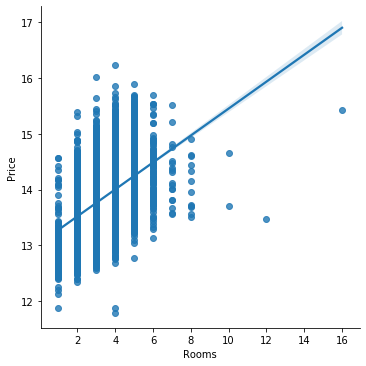

In [67]:
# Price x Rooms

plt.figure(figsize=(10,10))
#plt.title('Price x Rooms', fontsize = 15)
sns.lmplot(x='Rooms',y='Price',data=housing)

<Figure size 720x720 with 0 Axes>

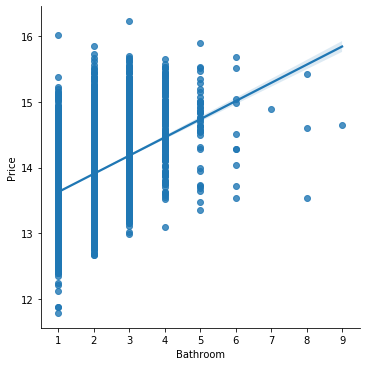

In [68]:
# Price x Bathroom

plt.figure(figsize=(10,10))
sns.lmplot(x='Bathroom',y='Price',data=housing)

<Figure size 720x720 with 0 Axes>

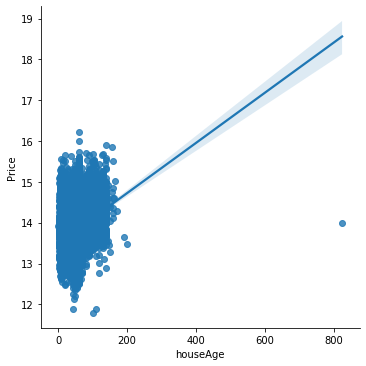

In [69]:
# Price x HouseAge

plt.figure(figsize=(10,10))
sns.lmplot(x='houseAge',y='Price',data=housing)

<Figure size 720x720 with 0 Axes>

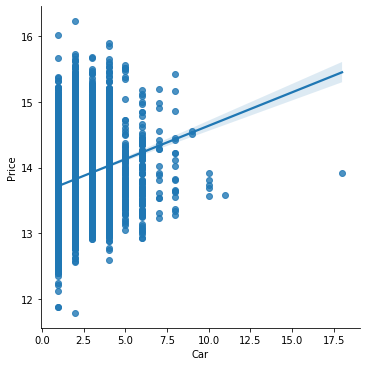

In [70]:
# Price x Car

plt.figure(figsize=(10,10))
sns.lmplot(x='Car',y='Price',data=housing)

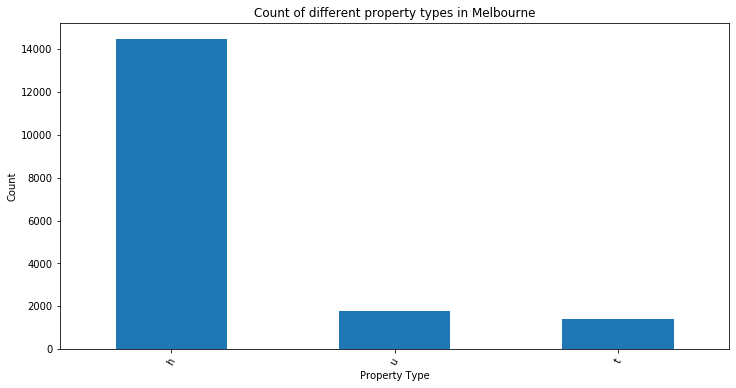

In [71]:
# Explore different property types and room types

prop_type = housing.Type.value_counts()

plt.figure(figsize=(12,6));
(prop_type).plot(kind='bar');
plt.xticks(rotation=60);
plt.title('Count of different property types in Melbourne');
plt.xlabel('Property Type');
plt.ylabel('Count');

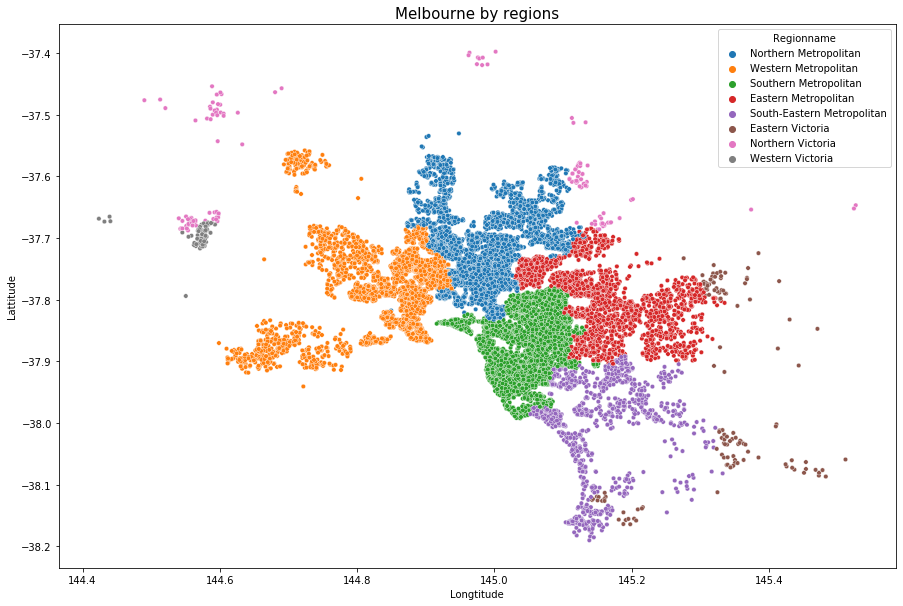

In [72]:
# Melbourne Map by Region Name

plt.figure(figsize=(15,10))
plt.title('Melbourne by regions', fontsize=15)
sns.scatterplot(x='Longtitude', y='Lattitude', hue='Regionname',s=20, data=housing)

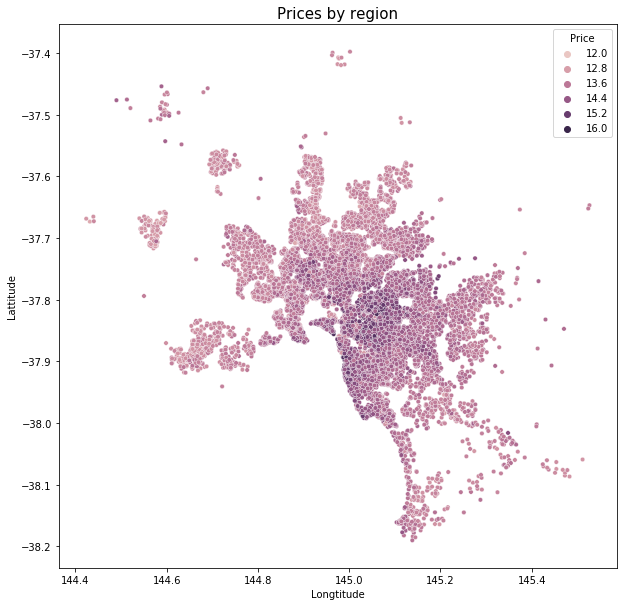

In [73]:
# Melbourne map by Price

plt.figure(figsize=(10,10))
plt.title('Prices by region', fontsize=15)
sns.scatterplot(x='Longtitude', y='Lattitude', hue='Price',s=20, data=housing)

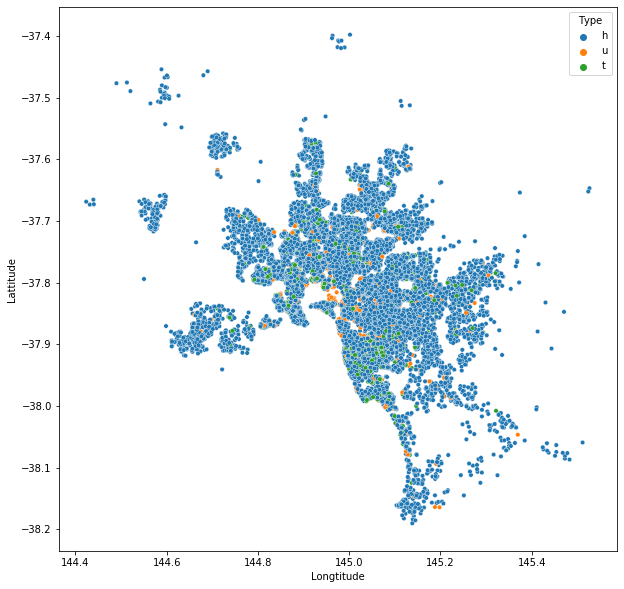

In [74]:
# Melbourne Map by Type

plt.figure(figsize=(10,10))
sns.scatterplot(x='Longtitude', y='Lattitude', hue='Type',s=20, data=housing)

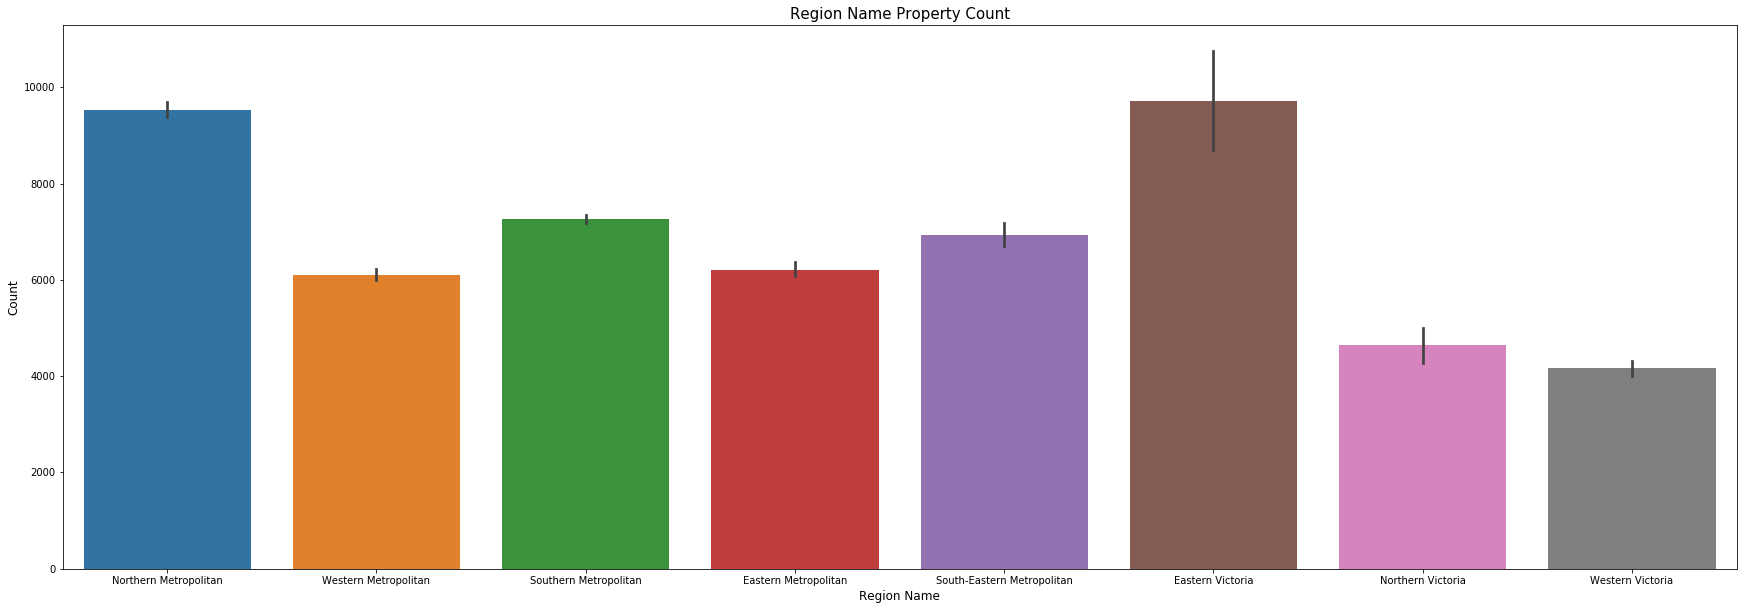

In [75]:
# Distribution of Property Count by Region Name

fig, ax1 = plt.subplots(1,1, figsize=(30,10)
                       )
sns.barplot(x='Regionname', y='Propertycount', data=housing, ax=ax1)

ax1.set_title('Region Name Property Count', fontsize=15)
ax1.set_xlabel('Region Name', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

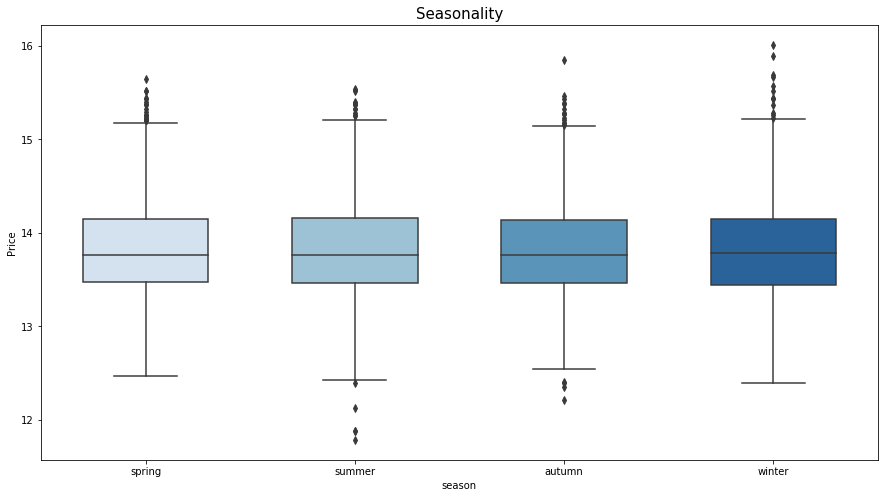

In [76]:
# Seasonality


# boxplot to see price distribution by season
plt.figure(figsize=(15,8))
plt.title('Seasonality', fontsize = 15)
sns.boxplot(x = 'season',  y = 'Price', data = housing, palette="Blues", width=0.6)
plt.show()

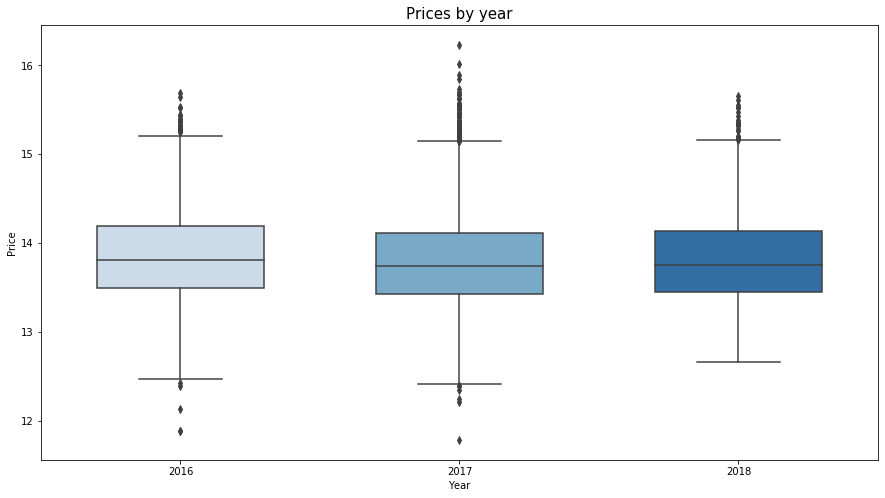

In [77]:
# Price x Year

# boxplot to see price distribution by year
plt.figure(figsize=(15, 8))
plt.title('Prices by year', fontsize = 15)
sns.boxplot(x = 'Year',  y = 'Price', data = housing, palette="Blues", width=0.6)
plt.show()

In [78]:
# Correlation of most important features

print("Find most important features relative to target")
corr = housing.corr()
corr.sort_values(['Price'], ascending = False, inplace = True)
print(corr.Price)

Find most important features relative to target
Price            1.000000
Rooms            0.429160
Bathroom         0.394221
houseAge         0.339866
Longtitude       0.269707
Car              0.188381
BuildingArea     0.071001
Landsize         0.016976
doy              0.008936
Year            -0.034937
Propertycount   -0.069590
Lattitude       -0.283455
YearBuilt       -0.339866
Distance        -0.354631
Name: Price, dtype: float64


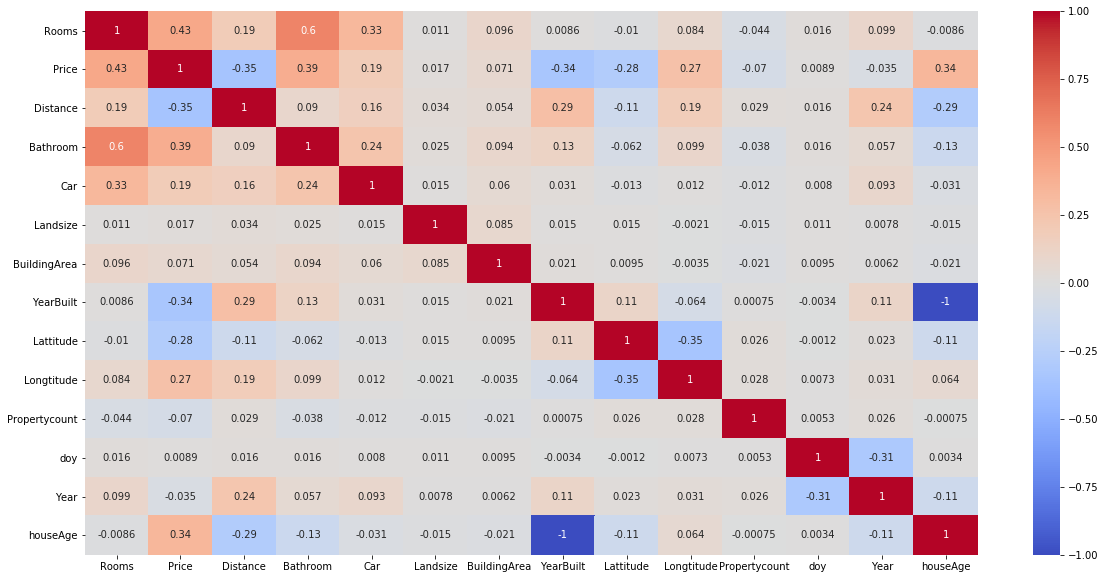

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(housing.corr(),cmap='coolwarm',annot=True)

In [80]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = housing.select_dtypes(include = ["object"]).columns
numerical_features = housing.select_dtypes(exclude = ["object"]).columns

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = housing[numerical_features]
train_cat = housing[categorical_features]

Numerical features : 15
Categorical features : 10


In [81]:
numerical_features

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'data', 'doy', 'Year', 'houseAge'],
      dtype='object')

In [82]:
train_num.head(5)

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,data,doy,Year,houseAge
1,2,14.207553,2.5,1,1,202.0,120.0,1970,-37.7996,144.9984,4019,2016-03-12,72,2016,50
5,3,13.652993,2.5,2,1,94.0,120.0,1970,-37.7969,144.9969,4019,2017-04-03,93,2017,50
6,4,14.285515,2.5,1,2,120.0,142.0,2014,-37.8072,144.9941,4019,2016-04-06,97,2016,6
14,2,14.307765,2.5,1,2,256.0,107.0,1890,-37.8060,144.9954,4019,2016-08-10,223,2016,130
18,2,13.908091,2.5,1,2,220.0,75.0,1900,-37.8010,144.9989,4019,2016-08-10,223,2016,120


In [83]:
train_cat.head(5)

,Suburb,Address,Type,Method,SellerG,Date,Postcode,CouncilArea,Regionname,season
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,3067,Yarra City Council,Northern Metropolitan,spring
5,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,3067,Yarra City Council,Northern Metropolitan,summer
6,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,3067,Yarra City Council,Northern Metropolitan,summer
14,Abbotsford,98 Charles St,h,S,Nelson,8/10/2016,3067,Yarra City Council,Northern Metropolitan,spring
18,Abbotsford,10 Valiant St,h,S,Biggin,8/10/2016,3067,Yarra City Council,Northern Metropolitan,summer


In [84]:
train_cat

,Suburb,Address,Type,Method,SellerG,Date,Postcode,CouncilArea,Regionname,season
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,3067,Yarra City Council,Northern Metropolitan,spring
5,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,3067,Yarra City Council,Northern Metropolitan,summer
6,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,3067,Yarra City Council,Northern Metropolitan,summer
14,Abbotsford,98 Charles St,h,S,Nelson,8/10/2016,3067,Yarra City Council,Northern Metropolitan,spring
18,Abbotsford,10 Valiant St,h,S,Biggin,8/10/2016,3067,Yarra City Council,Northern Metropolitan,summer
...,...,...,...,...,...,...,...,...,...,...
34849,Wollert,35 Kingscote Wy,h,SP,RW,24/02/2018,3750,Whittlesea City Council,Northern Metropolitan,NaN
34851,Yarraville,78 Bayview Rd,h,S,Jas,24/02/2018,3013,Maribyrnong City Council,Western Metropolitan,NaN
34852,Yarraville,13 Burns St,h,PI,Jas,24/02/2018,3013,Maribyrnong City Council,Western Metropolitan,NaN
34853,Yarraville,29A Murray St,h,SP,Sweeney,24/02/2018,3013,Maribyrnong City Council,Western Metropolitan,NaN


In [85]:
train_cat = train_cat.drop(columns=['Address', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 
                                    'season', 'Suburb'])
train_num = train_num.drop(columns=['YearBuilt', 'data', 'doy', 'Year'])


In [86]:
train_cat = pd.get_dummies(train_cat,drop_first=True)
train_cat.head(5)

,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,0,0,1,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,1,0,1,0,0,0,0,0
14,0,0,1,0,0,0,0,1,0,0,0,0,0
18,0,0,1,0,0,0,0,1,0,0,0,0,0


In [87]:
train = pd.concat([train_cat,train_num],axis=1)
train.shape

(17685, 24)

In [88]:
train

,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,...,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,houseAge
1,0,0,1,0,0,0,0,1,0,0,...,14.207553,2.5,1,1,202.0,120.0,-37.79960,144.99840,4019,50
5,0,0,0,0,0,0,0,1,0,0,...,13.652993,2.5,2,1,94.0,120.0,-37.79690,144.99690,4019,50
6,0,0,0,0,0,1,0,1,0,0,...,14.285515,2.5,1,2,120.0,142.0,-37.80720,144.99410,4019,6
14,0,0,1,0,0,0,0,1,0,0,...,14.307765,2.5,1,2,256.0,107.0,-37.80600,144.99540,4019,130
18,0,0,1,0,0,0,0,1,0,0,...,13.908091,2.5,1,2,220.0,75.0,-37.80100,144.99890,4019,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,0,0,0,0,1,0,0,1,0,0,...,13.253393,25.5,2,2,404.0,158.0,-37.61031,145.03393,2940,8
34851,0,0,1,0,0,0,0,0,0,0,...,13.911730,6.3,1,2,288.0,136.0,-37.81095,144.88516,6543,43
34852,0,0,0,0,0,0,0,0,0,0,...,14.207553,6.3,1,3,593.0,136.0,-37.81053,144.88467,6543,43
34853,0,0,0,0,1,0,0,0,0,0,...,13.696728,6.3,2,1,98.0,104.0,-37.81551,144.88826,6543,2


In [91]:
train.columns

Index(['Type_t', 'Type_u', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Rooms', 'Price', 'Distance', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude',
       'Propertycount', 'houseAge'],
      dtype='object')

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17685 entries, 1 to 34854
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type_t                                 17685 non-null  uint8  
 1   Type_u                                 17685 non-null  uint8  
 2   Method_S                               17685 non-null  uint8  
 3   Method_SA                              17685 non-null  uint8  
 4   Method_SP                              17685 non-null  uint8  
 5   Method_VB                              17685 non-null  uint8  
 6   Regionname_Eastern Victoria            17685 non-null  uint8  
 7   Regionname_Northern Metropolitan       17685 non-null  uint8  
 8   Regionname_Northern Victoria           17685 non-null  uint8  
 9   Regionname_South-Eastern Metropolitan  17685 non-null  uint8  
 10  Regionname_Southern Metropolitan       17685 non-null  uint8  
 11  Re



### Natural log and back to normal value using built-in numpy exp() function

y = np.log(train["Price"])

train["Price"] = np.exp(y)